# Insert Sort

In [1]:
 __author__ = 'Raul Ricardo Orcasitas'
import random
import time
import gc

Definición de los métodos para insert sort y merge sort

In [2]:
def insert_sort(lista):
    for indice in xrange(1,len(lista)):
        item = lista[indice]
        pos = indice
        while pos > 0 and lista[pos-1] > item:
            lista[pos] = lista[pos-1]
            pos -= 1
        lista[pos] = item

def merge_sort(lista):
    lista = mergesort_helper(lista)

def mergesort_helper(lista):
    if len(lista) <= 1:
        return lista
    else:
        midp = len(lista) // 2
        left = mergesort_helper(lista[:midp])
        right = mergesort_helper(lista[midp:])
        return merge_join(left,right)
    
def merge_join(left, right):
    sorted_list = []
    while left or right:
        if left and right:
            if left[0] < right[0]:
                sorted_list.append(left.pop(0))
            else:
                sorted_list.append(right.pop(0))
        else:
            if left:
                sorted_list.extend(left)
                break
            if right:
                sorted_list.extend(right)
                break
    return sorted_list


Función para calcular el tiempo de cada ordenamiento.

In [3]:
def calculate_time(sort_function, array):
    tiempo_total = 0
    gc.collect()
    for i in xrange(25):
        array_copy = list(array)
        t1 = time.clock()
        sort_function(array_copy)
        t2 = time.clock()
        tiempo_total += t2 - t1
    return tiempo_total/25

Prueba

In [5]:
mejores = []
peores = []
promedios = []

# Para n = 4
print 'n = 4'
lis1 = range(4)         #mejor
lis2 = list(lis1[::-1]) #peor
lis3 = list(lis1)
random.shuffle(lis3)    #promedio

#print 'Insert'
mejores.append(calculate_time(insert_sort, lis1))
peores.append(calculate_time(insert_sort, lis2))
promedios.append(calculate_time(insert_sort, lis3))
print mejores[0],peores[0],promedios[0]
print

# Para n = 5
print 'n = 5'
lis1 = range(5)         #mejor
lis2 = list(lis1[::-1]) #peor
lis3 = list(lis1)
random.shuffle(lis3)    #promedio

mejores.append(calculate_time(insert_sort, lis1))
peores.append(calculate_time(insert_sort, lis2))
promedios.append(calculate_time(insert_sort, lis3))
print mejores[1],peores[1],promedios[1]
print

# Para n = 6
print 'n = 6'
lis1 = range(6)         #mejor
lis2 = list(lis1[::-1]) #peor
lis3 = list(lis1)
random.shuffle(lis3)    #promedio

mejores.append(calculate_time(insert_sort, lis1))
peores.append(calculate_time(insert_sort, lis2))
promedios.append(calculate_time(insert_sort, lis3))
print mejores[2],peores[2],promedios[2]
print


 n = 4
5.90704837443e-06 9.73864731947e-06 7.93688353028e-06

n = 5
6.63687674503e-06 1.34105963097e-05 7.16144088645e-05

n = 6
9.73636660645e-05 7.90723425266e-05 2.08001085618e-05



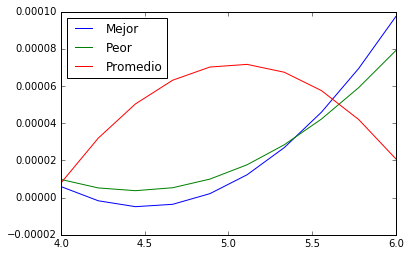

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math

x = np.linspace(4,6,3,endpoint=True)
x2 = np.linspace(4,6,10,endpoint=True)

f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

#plt.plot(x,mejores,x,peores,x,promedios)
plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Peor','Promedio'],loc='best')

In [9]:
def exper_analysis(sizes):
    results_merge = []
    results_insertion = []
    for i in sizes:
        list1 = range(i)
        random.shuffle(list1)
        results_merge.append(calculate_time(merge_sort, list1))
        results_insertion.append(calculate_time(insert_sort, list1))        
    return (results_merge, results_insertion)


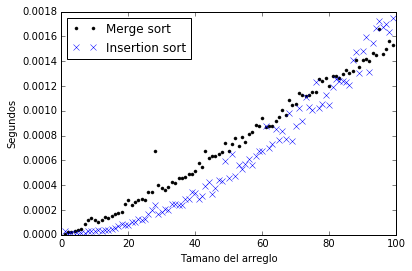

In [10]:
import numpy as np
import pylab as pl
%matplotlib inline
pl.clf()
sizes = np.arange(1,100,1)
(y1,y2) = np.array(exper_analysis(sizes))
pl.plot(sizes, y1, 'k.', label = 'Merge sort')
pl.plot(sizes, y2, 'bx', label = 'Insertion sort')
pl.xlabel('Tamano del arreglo')
pl.ylabel('Segundos')
pl.legend(loc = 'upper left')